# Mid-Course Project



### Problem Statement

A multinational retail company decides to embark on a campaign called **'Operation  Increase Sales and Profit' (OISP)** which focuses on increasing the sales of the company and maximising profit. 

Before the management team of the company can take any actionable decision with regards to the campaign,they want to draw the necessary insight from their 'sitting data'.

As their Data Analyst,you are presented with their four year daily sales records (**superstore data.csv**).

#### Task
Analyse the given  data and advise management on what to do to increase sales and profit as intended in the compaign.

Kindly  outlay your analytical steps inline with CRISP-DM(Cross Industry Standard Process for Data Mining)steps, asking the nescessary questions and providing answers based on the data.


Management expects statistical summaries of the key variables considering the aim of the campaign, visualizations and a report on your findings and your advice.

**Use Powerpoint or any other presentation application for your presentation.**

Good Luck !








In [1]:
##Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)


In [2]:
# Reading the data
# NB: Make sure you the data in your current working directory

df = pd.read_csv("sample_superstore.csv", parse_dates = ["Order Date","Ship Date"], encoding = "latin1")

In [3]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.62,2,0.0,6.8714


In [4]:
for col in df.columns:
    print(col)

Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
Country
City
State
Postal Code
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit


### Hints on Data preparation and exploration 

1. Load the data.
2. Inspect the data
3. Check for missing values
4. Check the data of each column
5. Check the different categories in the categorical variables
6. Take a view of the data
7. Take the descritive statistics for the numerical variables
9. Check the ditribution of the variables
10. Feature Engineering
#Create columns for:

#Unit price (sale/quantity)

#Year

#Month

#interval between the order date and the shipping date in days.


## Hints on the analysis 

### Check: The following  possible questions may of interest to you.

1. What is the sales and profit per market? 

2. What is the most and least profitable market?

3. How are you going to increase the sales for the products that least bought?

4. Which month does the company records more sales?

5. What is the correlation between discount and sale?

6. Does the shipping cost affect the sales?

7. What is the dominant product category in each market?

8. City with most orders for a given product category?

9. which products are making loss?

10. Which segment provides more profit?

11. what is the correlation between quantity and profit?

12. what it the correlation between shipping cost and profit?

13. Which order priority yields more sales?

14. What is the average shipping cost to each region?

15. What product categories should be targetted to the  different markets?

16. Does the interval between the order date and the shipping date affect sale and profit


###  1. Data gathering and Cleaning

#### About the dataset

In [5]:
df.drop(['Row ID'] ,inplace = True, axis = 1)


In [6]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
print(f"{df.shape} There are 9994 rows and 20 columns in the dataset")


(9994, 20) There are 9994 rows and 20 columns in the dataset


### 2.Exploratory data analysis, data cleaning, and Feature engineering

#### Inspecting the data

In [8]:
# Display the first 5 rows of the dataset 

df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
# Display the last 5 rows of the dataset 

df.tail()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Carpets,91.960,2,0.0,15.6332
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtout Fax/Phone Line Protection",243.160,2,0.0,72.9480


#### Check the info for various colunms and datatype

In [10]:
# Generate the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

#### Check the summary statistics of the data

In [11]:
# Describe the dataset

df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### Check for duplicates

In [12]:
# Check for duplicate

duplicates = df.duplicated()

In [13]:
df[duplicates]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3406,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,"Global Leather Highback Executive Chair with Pneumatic Height Adjustment, Black",281.372,2,0.3,-12.0588


In [14]:
df.shape

(9994, 20)

There is a complete duplicate of Row ID 3406 in 3407 so we cvan decide to keep either.

#### Drop the complete duplicate

In [15]:
# Drop the duplicate

df.drop_duplicates(inplace = True)

In [16]:
# Recheck for exiting duplicates

df.shape

(9993, 20)

#### Check for missing values

In [17]:
# Check the sum of all missing values in the data

df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

There are no missing values in the data

### Inspecting and exploring various columns of the data

In [18]:
categorical_var = df.select_dtypes(include = "object")
numerical_var = df.select_dtypes(include = np.number)

In [19]:
# Iterate all Categorical Variables in the data

for col in categorical_var.columns:
    print(col)

Order ID
Ship Mode
Customer ID
Customer Name
Segment
Country
City
State
Region
Product ID
Category
Sub-Category
Product Name


### Create a function to explore the categorical variable

This is to easily explore the numerical and graphical nature of the categorical variables

In [20]:
# Create a function named "explore_categorical_var" to explore the categorical variables of the data

def explore_categorical_var(df, x):
    
    """ To return the numerical and graphical summary of 
    categorical variables by taking df and x as argument """
    
    nunique_categories = df[x].nunique()
    if nunique_categories <= 6 :
        print("Summary")
        print("===============================")
        print(df[x].describe(), "\n")
        sns.countplot(df[x])
        plt.show()
        print("===============================")
        print("Value count \n")
        print(df[x].value_counts(), "\n")
        print("===============================")
        print(f"Missing values: {df[x].isnull().sum()}")
        
    elif nunique_categories > 6 and nunique_categories <= 10 :
        print("Summary")
        print("===============================")
        print(df[x].describe(), "\n")
        sns.countplot(y = df[x])
        plt.show()
        print("===============================")
        print("Value count \n")
        print(df[x].value_counts(), "\n")
        print("===============================")
        print(f"Missing values: {df[x].isnull().sum()}")
        
    else :
        print("Summary")
        print("===============================")
        print(df[x].describe(), "\n")
        print("===============================")
        print("Value count \n")
        print(df[x].value_counts(), "\n")
        print("===============================")
        print(f"Missing values: {df[x].isnull().sum()}")

#### Explore Order ID column of the date

In [21]:
# Output the head of "Order ID"

df["Order ID"].head()

0    CA-2016-152156
1    CA-2016-152156
2    CA-2016-138688
3    US-2015-108966
4    US-2015-108966
Name: Order ID, dtype: object

In [22]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "Order ID")

Summary
count               9993
unique              5009
top       CA-2017-100111
freq                  14
Name: Order ID, dtype: object 

Value count 

CA-2017-100111    14
CA-2017-157987    12
US-2016-108504    11
CA-2016-165330    11
CA-2016-105732    10
                  ..
CA-2016-157259     1
CA-2017-107986     1
US-2015-112508     1
US-2016-126844     1
CA-2017-119914     1
Name: Order ID, Length: 5009, dtype: int64 

Missing values: 0


#### Explore Ship Mode column of the date

In [23]:
# Output  the head of "Ship Mode"

df["Ship Mode"].head()

0      Second Class
1      Second Class
2      Second Class
3    Standard Class
4    Standard Class
Name: Ship Mode, dtype: object

Summary
count               9993
unique                 4
top       Standard Class
freq                5967
Name: Ship Mode, dtype: object 



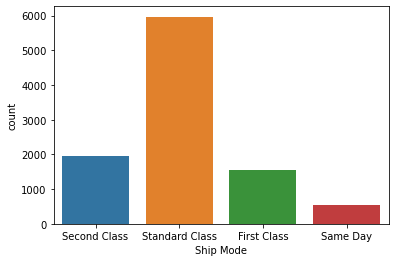

Value count 

Standard Class    5967
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64 

Missing values: 0


In [24]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "Ship Mode")

#### Explore Customer ID column of the date

In [25]:
# Output the head of "Customer ID"

df["Customer ID"].head()

0    CG-12520
1    CG-12520
2    DV-13045
3    SO-20335
4    SO-20335
Name: Customer ID, dtype: object

In [26]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "Customer ID")

Summary
count         9993
unique         793
top       WB-21850
freq            37
Name: Customer ID, dtype: object 

Value count 

WB-21850    37
JL-15835    34
MA-17560    34
PP-18955    34
CK-12205    32
            ..
LD-16855     1
AO-10810     1
CJ-11875     1
RE-19405     1
JR-15700     1
Name: Customer ID, Length: 793, dtype: int64 

Missing values: 0


#### Explore Customer Name column of the date

In [27]:
# Output the head of "Customer Name"

In [28]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "Customer Name")

Summary
count              9993
unique              793
top       William Brown
freq                 37
Name: Customer Name, dtype: object 

Value count 

William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
                       ..
Lela Donovan            1
Anthony O'Donnell       1
Carl Jackson            1
Ricardo Emerson         1
Jocasta Rupert          1
Name: Customer Name, Length: 793, dtype: int64 

Missing values: 0


#### Explore Segment column of the date

In [29]:
# Output the head of "Segment"

df["Segment"].head()

0     Consumer
1     Consumer
2    Corporate
3     Consumer
4     Consumer
Name: Segment, dtype: object

Summary
count         9993
unique           3
top       Consumer
freq          5191
Name: Segment, dtype: object 



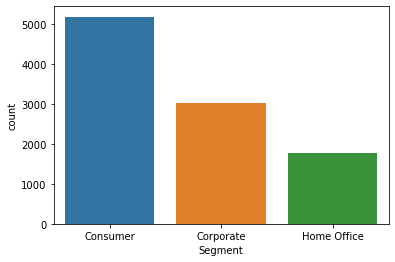

Value count 

Consumer       5191
Corporate      3020
Home Office    1782
Name: Segment, dtype: int64 

Missing values: 0


In [30]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "Segment")

#### Explore Country column of the date

In [31]:
# Output the head of "Country"

df["Country"].head()

0    United States
1    United States
2    United States
3    United States
4    United States
Name: Country, dtype: object

Summary
count              9993
unique                1
top       United States
freq               9993
Name: Country, dtype: object 



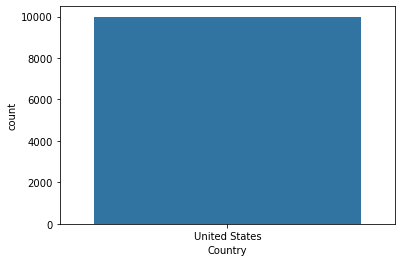

Value count 

United States    9993
Name: Country, dtype: int64 

Missing values: 0


In [32]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "Country")

#### Explore City column of the data 

In [33]:
# Output the head of "City"

df["City"].head()

0          Henderson
1          Henderson
2        Los Angeles
3    Fort Lauderdale
4    Fort Lauderdale
Name: City, dtype: object

In [34]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "City")

Summary
count              9993
unique              531
top       New York City
freq                915
Name: City, dtype: object 

Value count 

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64 

Missing values: 0


#### Explore the  State column of the data

In [35]:
# Output the head of "State"

df["State"].head()

0      Kentucky
1      Kentucky
2    California
3       Florida
4       Florida
Name: State, dtype: object

In [36]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "State")

Summary
count           9993
unique            49
top       California
freq            2001
Name: State, dtype: object 

Value count 

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     468
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island            

#### Explore Region column of the data



In [37]:
# Output the head

df["Region"].head()

0    South
1    South
2     West
3    South
4    South
Name: Region, dtype: object

Summary
count     9993
unique       4
top       West
freq      3203
Name: Region, dtype: object 



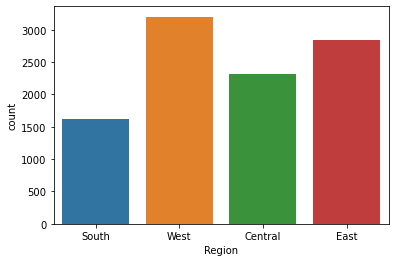

Value count 

West       3203
East       2847
Central    2323
South      1620
Name: Region, dtype: int64 

Missing values: 0


In [38]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "Region")

#### Explore the Product ID column of the data

In [39]:
# Output the head

df["Product ID"].head()

0    FUR-BO-10001798
1    FUR-CH-10000454
2    OFF-LA-10000240
3    FUR-TA-10000577
4    OFF-ST-10000760
Name: Product ID, dtype: object

In [40]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "Product ID")

Summary
count                9993
unique               1862
top       OFF-PA-10001970
freq                   19
Name: Product ID, dtype: object 

Value count 

OFF-PA-10001970    19
TEC-AC-10003832    18
FUR-FU-10004270    16
TEC-AC-10002049    15
FUR-CH-10001146    15
                   ..
TEC-PH-10003535     1
TEC-MA-10002937     1
OFF-AR-10004974     1
TEC-AC-10004814     1
OFF-ST-10001627     1
Name: Product ID, Length: 1862, dtype: int64 

Missing values: 0


#### Explore the Category column of the data

In [41]:
# Output the head

df["Category"].head()

0          Furniture
1          Furniture
2    Office Supplies
3          Furniture
4    Office Supplies
Name: Category, dtype: object

Summary
count                9993
unique                  3
top       Office Supplies
freq                 6026
Name: Category, dtype: object 



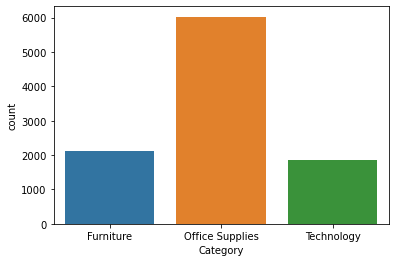

Value count 

Office Supplies    6026
Furniture          2120
Technology         1847
Name: Category, dtype: int64 

Missing values: 0


In [42]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "Category")

#### Explore the Sub-Category column of the data

In [43]:
# Output the head

df["Sub-Category"].head()

0    Bookcases
1       Chairs
2       Labels
3       Tables
4      Storage
Name: Sub-Category, dtype: object

In [44]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "Sub-Category" )

Summary
count        9993
unique         17
top       Binders
freq         1523
Name: Sub-Category, dtype: object 

Value count 

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          616
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64 

Missing values: 0


#### Explore the Product Name column of the data

In [45]:
# Output head

df["Product Name"].head()

0                              Bush Somerset Collection Bookcase
1    Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back
2      Self-Adhesive Address Labels for Typewriters by Universal
3                  Bretford CR4500 Series Slim Rectangular Table
4                                 Eldon Fold 'N Roll Cart System
Name: Product Name, dtype: object

In [46]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "Product Name")

Summary
count                9993
unique               1850
top       Staple envelope
freq                   48
Name: Product Name, dtype: object 

Value count 

Staple envelope                                                                        48
Staples                                                                                46
Easy-staple paper                                                                      46
Avery Non-Stick Binders                                                                20
Staples in misc. colors                                                                19
                                                                                       ..
Boston 1900 Electric Pencil Sharpener                                                   1
RCA ViSYS 25423RE1 Corded phone                                                         1
Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner     1
Newell 342                  

### Exploring the Numerical Variables

In [47]:
# Output the columns of the numerical variables

for col in numerical_var :
    print(col)

Postal Code
Sales
Quantity
Discount
Profit


### Create a function to explore the numerical variables

In [48]:
def explor_numerical_var(df, x) :
    
    """ To return the numerical and graphical summary of 
    numerical variables by taking df and x as argument """
        
    print("Summary statistics \n")
    print(df[x].apply([len, min, max, np.mean, np.median, np.std]))
    print("=================================================")
    print(f"Missing values: {df[x].isnull().sum()}")
    print("==================================================")
    plt.figure(figsize = (8, 4))
    #Plot a box plot
    meanpointdrop = dict(marker = "D", markeredgecolor ="black", markerfacecolor ="firebrick")
    medianprops = dict(linestyle ="-.", linewidth = 3, color="gold")
    plt.subplot(1,2,1)
    plt.boxplot(df[x], vert = True, patch_artist = True, notch = True,
            showmeans = True, medianprops = medianprops, meanprops = meanpointdrop)
    plt.xlabel(df[x].name)
    plt.title("Boxplot")

    # plotting a histogram
    plt.subplot(1,2,2)
    plt.hist(df[x], bins = 10)
    plt.title("Histogram")
    plt.tight_layout()
    plt.show()

#### Explore Sales column of the date

In [49]:
# Output the head of Sales

df["Sales"].head()

0    261.9600
1    731.9400
2     14.6200
3    957.5775
4     22.3680
Name: Sales, dtype: float64

Summary statistics 

len        9993.000000
min           0.444000
max       22638.480000
mean        229.852846
median       54.480000
std         623.276074
Name: Sales, dtype: float64
Missing values: 0


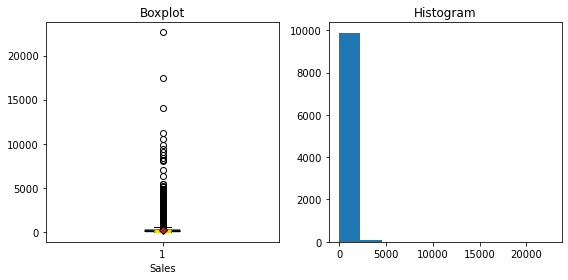

In [50]:
# Call explor_numerical_var function

explor_numerical_var(df, "Sales")

##### Further insight of the Sales column

In [51]:
# Output the maximum sales row

max_sale =np.where(df["Sales"]== df["Sales"].max())
df.iloc[max_sale]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferencing Unit,22638.48,6,0.5,-1811.0784


In [52]:
# Output the minimum sales row

min_sale =np.where(df['Sales']== df['Sales'].min())
df.iloc[min_sale]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4101,US-2017-102288,2017-06-19,2017-06-23,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,Texas,77095,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsman Heavy-Duty Upright Vacuum,0.444,1,0.8,-1.11


The maximum sales is justified by the product(Cisco TelePresence System EX90 Videoconferenci) that was bought. A discount of 50% was given.
The minimum sales is also justified. A high discount of 80% was given but only one item was bought.

#### Explore Quantity column of the date

In [53]:
# Output head

df["Quantity"].head()

0    2
1    3
2    2
3    5
4    2
Name: Quantity, dtype: int64

Summary statistics 

len       9993.000000
min          1.000000
max         14.000000
mean         3.789753
median       3.000000
std          2.225149
Name: Quantity, dtype: float64
Missing values: 0


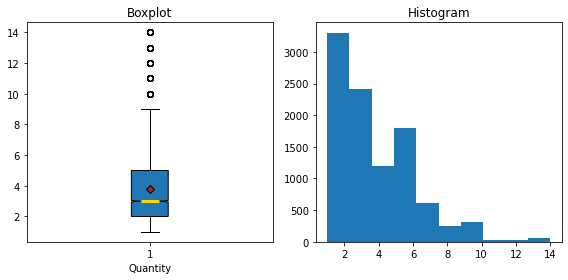

In [54]:
# Call explor_numerical_var function

explor_numerical_var(df, "Quantity")

#### Explore Profit column of the date

In [55]:
# Output the head

df["Profit"].head()

0     41.9136
1    219.5820
2      6.8714
3   -383.0310
4      2.5164
Name: Profit, dtype: float64

Summary statistics 

len       9993.000000
min      -6599.978000
max       8399.976000
mean        28.660971
median       8.671000
std        234.271476
Name: Profit, dtype: float64
Missing values: 0


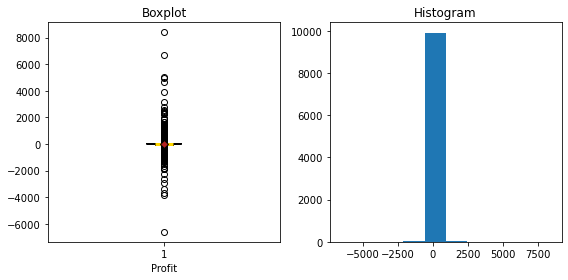

In [56]:
# Call explor_numerical_var function

explor_numerical_var(df, "Profit")

##### Further insight of the Profit column

In [57]:
# Output the maximum profit row

max_profit =np.where(df['Profit']== df['Profit'].max())
df.iloc[max_profit]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6826,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,8399.976


In [58]:
# Output the minimum profit row

min_profit =np.where(df['Profit']== df['Profit'].min())
df.iloc[min_profit]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7772,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,Ohio,43130,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.978


#### Explore Discount column of the data

In [59]:
# Output the head

df["Discount"].head()

0    0.00
1    0.00
2    0.00
3    0.45
4    0.20
Name: Discount, dtype: float64

Summary statistics 

len       9993.000000
min          0.000000
max          0.800000
mean         0.156188
median       0.200000
std          0.206457
Name: Discount, dtype: float64
Missing values: 0


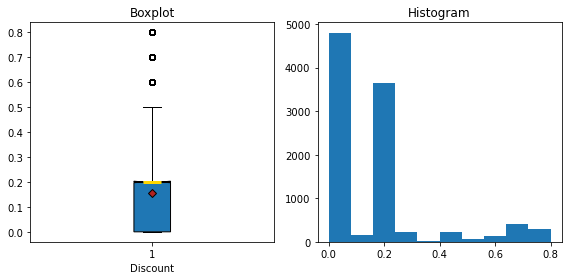

In [60]:
# Call explore_numerical_var function

explor_numerical_var(df, "Discount")

### Feature Engineering

From the exploratory and inspection of the numerical variable, We realize the monetary columns are in 3 decimal place.

As a result, those ["Sales" and "Profit"] columns need to be converted into 2 decimal place

In [61]:
# Round "Sales" column to 2 decimal place

df["Sales"] = round(df["Sales"], 2)

In [62]:
# Round "Profit" column to 2 decimal place

df["Profit"] = round(df["Profit"], 2)

#### Extracting and adding columns


In [63]:
# Computing Original sales prices for each column and storing it as a column

df["Original Sales"] = round(df["Sales"]/(1 - df["Discount"]), 2)

In [64]:
# Compute the Unit Price as a column

df["Unit Price"]= round(df["Original Sales"]/df["Quantity"], 2)

In [65]:
# Compute the Discounted Amount and store as a column

df["Discounted Amount"] = round(df["Original Sales"] - df["Sales"])

In [66]:
# Extract the Day, Month, and Year from the "Order Date" and store as columns

df['Day'] = df['Order Date'].dt.day_name()
df['Month'] = df['Order Date'].dt.month_name()
df['Year'] = df['Order Date'].dt.year
df['Processing Time'] = df['Ship Date'] - df['Order Date']


In [67]:
# Output the head of the data

df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Original Sales,Unit Price,Discounted Amount,Day,Month,Year,Processing Time
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,261.96,130.98,0.0,Tuesday,November,2016,3 days
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.94,3,0.00,219.58,731.94,243.98,0.0,Tuesday,November,2016,3 days
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.62,2,0.00,6.87,14.62,7.31,0.0,Sunday,June,2016,4 days
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,1741.05,348.21,783.0,Sunday,October,2015,7 days
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52,27.96,13.98,6.0,Sunday,October,2015,7 days


In [68]:
df['Processing Time'].dtypes

dtype('<m8[ns]')

### Exploratory Data Analysis (EDA)

#### Create a DataFrame of all the Numeriacal variables  

In [69]:
# Extract the numerical variables and asign to a new variable num_var as dataframe

num_var = df[["Sales", "Quantity", "Profit", "Discount",
             "Original Sales", "Unit Price", "Discounted Amount"]]
num_var.head()

,Sales,Quantity,Profit,Discount,Original Sales,Unit Price,Discounted Amount
0,261.96,2,41.91,0.00,261.96,130.98,0.0
1,731.94,3,219.58,0.00,731.94,243.98,0.0
2,14.62,2,6.87,0.00,14.62,7.31,0.0
3,957.58,5,-383.03,0.45,1741.05,348.21,783.0
4,22.37,2,2.52,0.20,27.96,13.98,6.0


#### Finding the correlation between the numerical variables

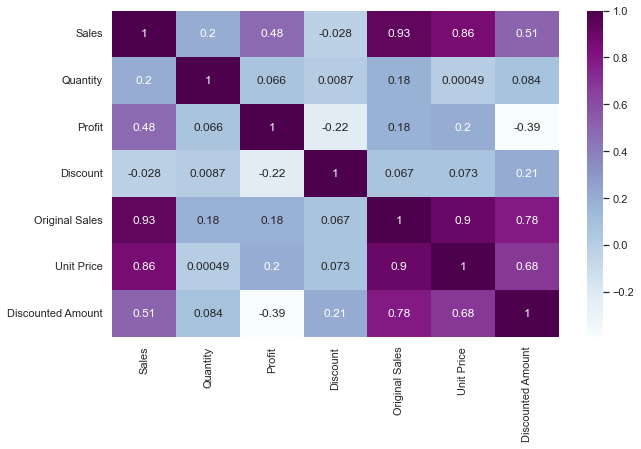

In [70]:
# Find the correlation between the numerical variables

plt.figure(figsize = (10, 6))
sns.set_theme(style = "white")
corr = num_var.corr()
sns.heatmap(corr, annot = True, cmap = "BuPu")
plt.show()

#### Average sales per segment

In [71]:
# Group the numerical variable by segment

seg_per = num_var.groupby(df["Segment"]).mean().reset_index()
seg_per

,Segment,Sales,Quantity,Profit,Discount,Original Sales,Unit Price,Discounted Amount
0,Consumer,223.733600,3.760547,25.836764,0.158141,280.576072,74.440368,56.847043
1,Corporate,233.823285,3.843709,30.456666,0.158228,286.091073,75.224503,52.266225
2,Home Office,240.949405,3.783389,33.844461,0.147043,304.750494,79.381498,63.794052


#### Average Sales and Profit per Segment

<Figure size 432x288 with 0 Axes>

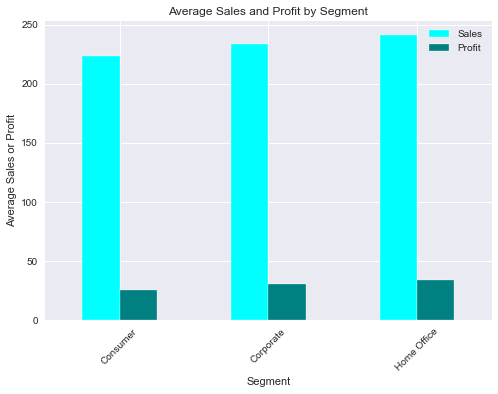

In [92]:
# Plot a bar chart to show the average sales and profit per segment

plt.figure(figsize = (6,4))
sales_profit = num_var[["Sales", "Profit"]].groupby(df["Segment"]).mean()
sales_profit.plot(kind = "bar", color = ["cyan", "teal"])
plt.title("Average Sales and Profit by Segment")
plt.xlabel("Segment")
plt.xticks(rotation = 45)
plt.ylabel("Average Sales or Profit")
plt.show()


Home office recorded the highest average sales, with the highest average profit, as well as the highest discounted amount, despite having the least average discount. Home office had the highest average unit prices, which reflected in its high average sales, yet home office recorded the second highest average quantity which also contributed to its high sales as well. The high unit prices of home office caused customers to patronize the home office segment when the least discount was given, since it would help them save more.

Corporate recorded the second highest average sales, yet, the highest average quantity, whilst having the highest average discount and despite the discounts,corporate had the second highest average profit.Discount, thus, affected the sale of products of the corporate segment. Products in the corporate segment should be given discounts to increase sales. 

#### Average Sales and Profit per Category

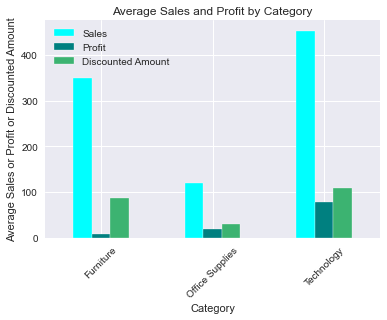

In [98]:
# Plot a bar chart to show the average sales and profit per category

cat_sales_profit = num_var[["Sales", "Profit","Discounted Amount"]].groupby(df["Category"]).mean()
cat_sales_profit.plot(kind = 'bar',
                      color = ["cyan", "teal","mediumseagreen"],
                      figsize = (6,4))
plt.title('Average Sales and Profit by Category')
plt.xlabel('Category')
plt.xticks(rotation = 45)
#plt.yscale('log')
plt.ylabel('Average Sales or Profit or Discounted Amount()')
#plt.legend(loc = 'upper right')
plt.show()


Technology recorded the highest average sales and profit due to discounts that were given and its high unit prices, however furniture did not incur as much profit despite high sales due to discounts, thus, discounts for the furniture category had a positve relation to furniture sales yet negative relation to its profit. Discounts for furniture category should still be given but at reduced rates so as to still increase sales as well as profit. Discounts affected offices supplies, increasing average quantity to the highest sold, discounts should be given to office supplies to increase sales and profits.

#### Average Sales and Profit per Sub-Category

<Figure size 720x576 with 0 Axes>

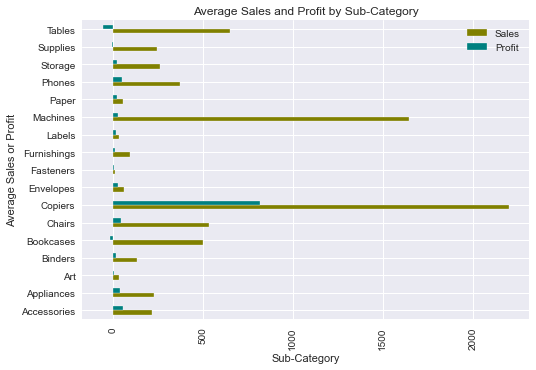

In [121]:
plt.figure(figsize = (10,8))
sales_profit = num_var[["Sales", "Profit"]].groupby(df["Sub-Category"]).mean()
sales_profit.plot(kind = "barh", color = ["olive", "teal"])
plt.title("Average Sales and Profit by Sub-Category")
plt.xlabel("Sub-Category")
plt.xticks(rotation = 90)
plt.ylabel("Average Sales or Profit")
plt.show()

Copiers recorded highest average sales and profit with the average discount of 0.16; copiers have the highest unit price and thus, the most expensive to buy, hence discounts caused customers to buy more copiers, because it helped them save. Due to the high unit prices, discounts did not cause a significant change in profit. Discounts on copiers should thus be given to have high sales and profit.

Machines had the second highest average sales, yet low average profit; the highest average discounts was recorded for machines and this influenced sales as machines had high unit prices, yet, the high discount caused low profits. Machines should be given discounts at reduced rates. Tables were given high discounts and this increased sales but caused negative profits. Quantity of tables sold increased, being the third highest average quantity. Discounts affected sale of tables, tables should thus, be given discounts at reduced rates. 

#### Average Sales and Profit per Region

<Figure size 432x288 with 0 Axes>

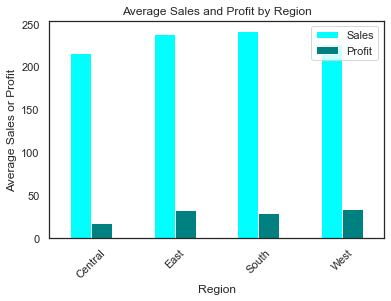

In [76]:
plt.figure(figsize = (6,4))
sales_profit = num_var[["Sales", "Profit"]].groupby(df["Region"]).mean()
sales_profit.plot(kind = "bar", color = ["cyan","teal"])
plt.title("Average Sales and Profit by Region")
plt.xlabel("Region")
plt.xticks(rotation = 45)
plt.ylabel("Average Sales or Profit")
plt.show()

#### Average Sales per State

In [77]:
#Top states with the highest sales

top_states_highest=df.groupby(by="State", axis = 0)[["Sales","Profit"]].agg(np.mean).sort_values(by=["Sales","Profit"], ascending = False).reset_index()
top_states_highest = top_states_highest.head(10)
top_states_highest

,State,Sales,Profit
0,Wyoming,1603.140000,100.200000
1,Vermont,811.760909,204.089091
2,Nevada,428.951282,85.045128
3,Rhode Island,404.070714,130.100536
4,Montana,372.623333,122.221333
5,Indiana,359.431946,123.375436
6,Missouri,336.441667,97.518030
7,Minnesota,335.541011,121.609101
8,Alabama,319.846557,94.866230
9,Virginia,315.342500,83.026741


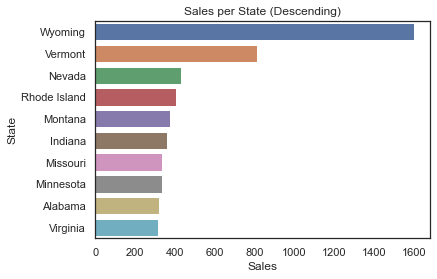

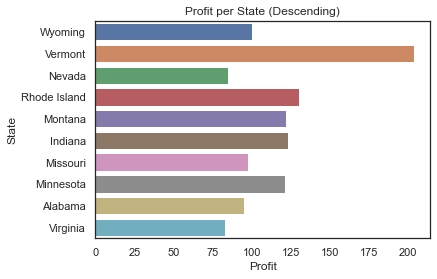

In [78]:
#Sales of states


sns.barplot(
            x = 'Sales',
            y = 'State',
            orient='h',
           data= top_states_highest, ci = None
            ).set(title = "Sales per State (Descending)")
 
# Show the plot
plt.show()


sns.barplot(
            x = 'Profit',
            y = 'State',
            orient='h',
           data= top_states_highest, ci = None
            ).set(title = "Profit per State (Descending)")
 
# Show the plot
plt.show()

#### Average Profit per State

In [79]:
#Profit of states
top_states_lowest=df.groupby(by="State", axis = 0)[["Sales","Profit"]].agg(np.mean).sort_values(by=["Sales","Profit"], ascending = False).reset_index()
top_states_lowest = top_states_lowest.tail(10)
top_states_lowest


,State,Sales,Profit
39,Connecticut,163.223902,42.822439
40,Illinois,162.939248,-25.625894
41,Maine,158.816250,56.811250
42,Arizona,157.508661,-15.303080
43,Iowa,152.658667,39.460000
44,Oregon,140.573548,-9.600565
45,North Dakota,131.415714,32.877143
46,New Mexico,129.284865,31.273784
47,Kansas,121.429583,34.851667
48,South Dakota,109.630000,32.903333


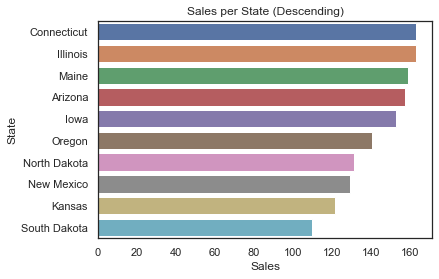

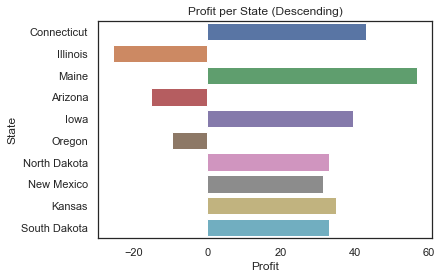

In [80]:
#Sales of states


sns.barplot(
            x = 'Sales',
            y = 'State',
            orient='h',
           data= top_states_lowest, ci = None
            ).set(title = "Sales per State (Descending)")
 
# Show the plot
plt.show()


sns.barplot(
            x = 'Profit',
            y = 'State',
            orient='h',
           data= top_states_lowest, ci = None
            ).set(title = "Profit per State (Descending)")
 
# Show the plot
plt.show()

<Figure size 432x288 with 0 Axes>

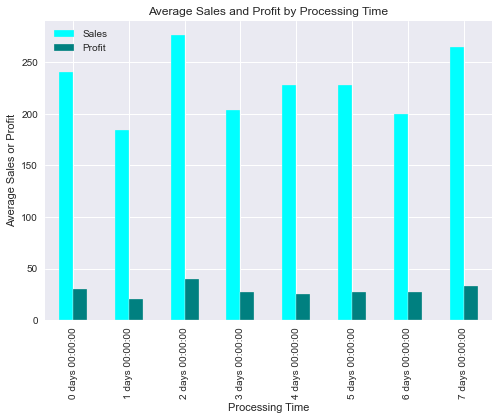

In [133]:
plt.figure(figsize = (6,4))
plt.style.use('seaborn')
sales_profit = num_var[["Sales", "Profit"]].groupby(df["Processing Time"]).mean()
sales_profit.plot(kind = "bar", color = ["cyan","teal"])
plt.title("Average Sales and Profit by Processing Time")
plt.xlabel("Processing Time")
plt.xticks(rotation = 90)
plt.ylabel("Average Sales or Profit")
plt.show()

#### Average Sales and Profit per Day

In [82]:
# Create a dictionary for months

Month = {"January":0, "February":1, "March":2, "April":3, "May":4, "June":5, 
         "July":6, "August":7, "September":8, "October":9, "November":10, "December":11}

In [83]:
df_year = df.groupby(["Day","Month","Year",
                      "Category","Sub-Category",
                      "Discount","Discounted Amount"])["Profit", "Sales"].mean().reset_index()
df_year.sort_values("Month", key = lambda x : x.apply (lambda x : Month[x]), inplace = True)
df_year.head()

,Day,Month,Year,Category,Sub-Category,Discount,Discounted Amount,Profit,Sales
5424,Thursday,January,2017,Furniture,Furnishings,0.2,8.0,6.39,31.97
1766,Monday,January,2017,Furniture,Tables,0.0,0.0,21.10,210.98
1765,Monday,January,2017,Furniture,Furnishings,0.0,0.0,11.31,31.25
1764,Monday,January,2017,Furniture,Chairs,0.2,105.0,-68.11,419.14
1763,Monday,January,2017,Furniture,Chairs,0.2,30.0,-13.59,120.78


In [84]:
avg_day = num_var[["Sales", "Profit"]].groupby(df["Day"]).mean()

avg_day

,Sales,Profit
Day,,
Friday,235.254296,25.588878
Monday,229.255863,27.531336
Saturday,216.304918,24.941094
Sunday,225.353047,33.409006
Thursday,220.072324,27.124983
Tuesday,259.683074,32.161049
Wednesday,237.231378,39.773000


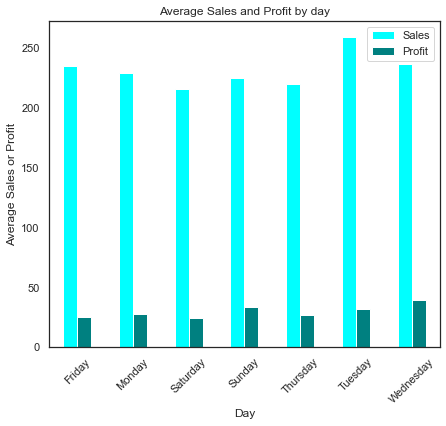

In [85]:
# Plot a bar chart to show the average sales and profit per day

avg_day.plot(kind = 'bar',
                      color = ["cyan", "teal"],
                      figsize = (7,6))
plt.title('Average Sales and Profit by day')
plt.xlabel('Day')
plt.xticks(rotation = 45)
#plt.yscale('log')
plt.ylabel('Average Sales or Profit')
#plt.legend(loc = 'upper right')
plt.show()


#### Average Sales per Month

In [86]:
# Group average sales per month

avg_month_sales = df.groupby(["Month"])["Sales"].mean().reset_index()
avg_month_sales.sort_values("Month", key = lambda x : x.apply (lambda x : Month[x]), inplace = True)
avg_month_sales.head()

,Month,Sales
4,January,249.146640
3,February,199.170867
7,March,294.548103
0,April,206.118081
8,May,210.923565


#### Average Sales per Month for the 4 Year 

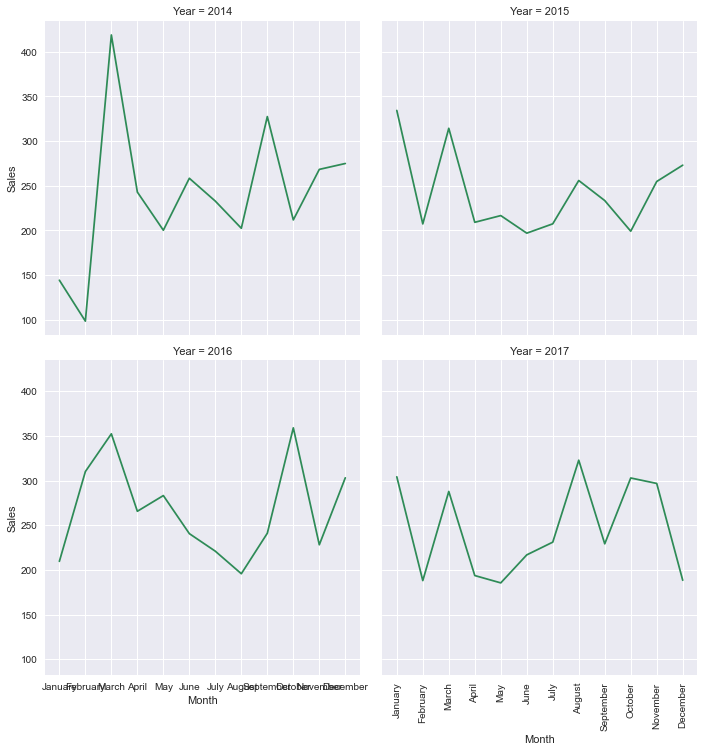

In [137]:
# Plot the Sales over the 4 years

plt.style.use("seaborn")
sns.relplot(x='Month',y='Sales',col='Year',
            data=df_year ,kind='line',ci=None, col_wrap = 2, color = "seagreen")

plt.xticks(rotation = 90)
plt.show()

Over the four years, sales was recorded to be high in the first and last trimester of each year, the spasms of new years and ending years reflects in sales as sales are consistently high over the four years. During the the mid of the year however, sales are low; discounts were averagely highly during the second trimester of every year, however, sales were consistently lower.This is no new phenomena, however, higher discounts, promotional sales and effective advertisement on these discounts and promotional sales can greatly increase sales during the mid year.

##### Average Profit per Month for the 4 Year

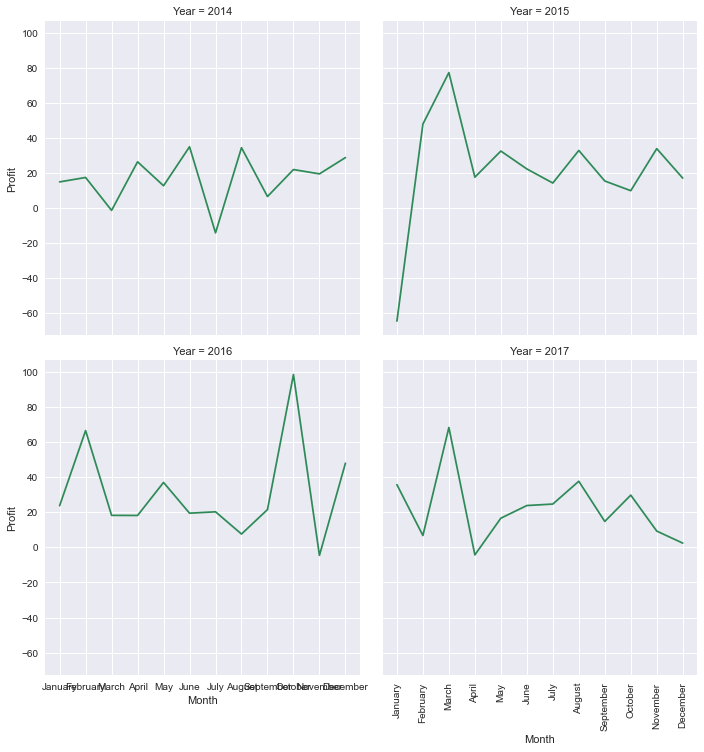

In [142]:
# Plot the Profit over the 4 years

plt.style.use("seaborn")
sns.relplot(x = "Month", y = "Profit", col = 'Year',
            data = df_year, kind = "line",ci = None, col_wrap = 2, color = "seagreen")

plt.xticks(rotation = 90)
plt.show()

#### Discount per Month over the 4 years

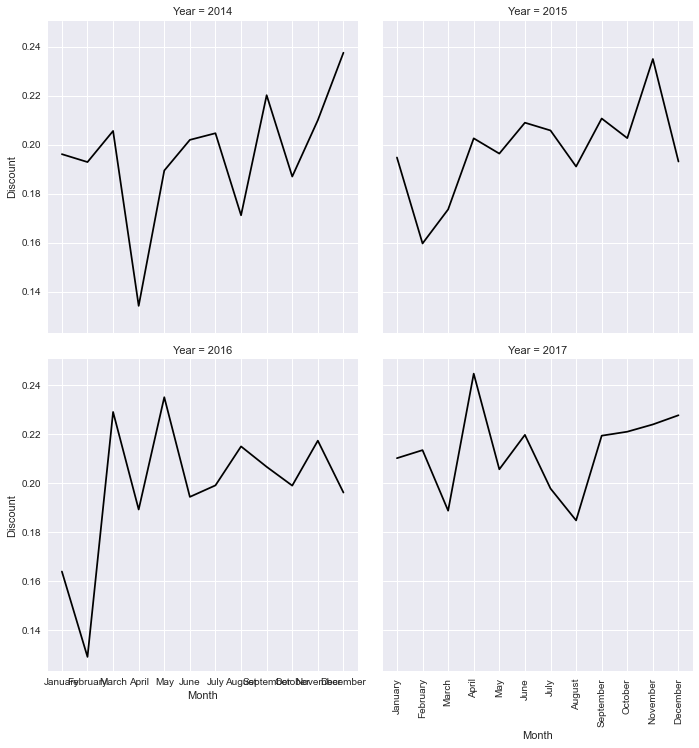

In [90]:
# Plot the Discount over the 4 years

plt.style.use("seaborn")
sns.relplot(x = "Month", y = "Discount", col = 'Year',
            data = df_year, kind = "line",ci = None,
            col_wrap = 2, color = "black")

plt.xticks(rotation = 90)
plt.show()

In [91]:
#plt.style.available